In [ ]:
from google.colab import files, drive
import numpy as np
import glob
from skimage.io import imread
from matplotlib.image import imread
from skimage.transform import resize
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! rm -r dataset

rm: cannot remove 'dataset': No such file or directory


In [ ]:
# Copy dataset from drive

!cp -r '/content/drive/My Drive/ML_dataset_1.5K.zip' dataset.zip
!unzip dataset.zip -d content
! mv content/ML_dataset dataset

! rm dataset.zip
! rm -r content

Archive:  dataset.zip
   creating: content/ML_dataset/
  inflating: content/ML_dataset/cloudy_1.jpg  
  inflating: content/ML_dataset/cloudy_102.jpg  
  inflating: content/ML_dataset/cloudy_104.jpg  
  inflating: content/ML_dataset/cloudy_106.jpg  
  inflating: content/ML_dataset/cloudy_107.jpg  
  inflating: content/ML_dataset/cloudy_109.jpg  
  inflating: content/ML_dataset/cloudy_110.jpg  
  inflating: content/ML_dataset/cloudy_111.jpg  
  inflating: content/ML_dataset/cloudy_113.jpg  
  inflating: content/ML_dataset/cloudy_115.jpg  
  inflating: content/ML_dataset/cloudy_120.jpg  
  inflating: content/ML_dataset/cloudy_121.jpg  
  inflating: content/ML_dataset/cloudy_122.jpg  
  inflating: content/ML_dataset/cloudy_123.jpg  
  inflating: content/ML_dataset/cloudy_124.jpg  
  inflating: content/ML_dataset/cloudy_125.jpg  
  inflating: content/ML_dataset/cloudy_126.jpg  
  inflating: content/ML_dataset/cloudy_127.jpg  
  inflating: content/ML_dataset/cloudy_128.jpg  
  inflating: con

In [ ]:
# Creation of the random sorted image list

img_list = sorted(glob.glob("./dataset/*.jpg"))

random.shuffle(img_list)

img_list_clean = []

for item in img_list:
  img_list_clean.append(item.replace("./dataset/","").replace(".jpg",""))



In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(200, 
                                                              300,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
# Transform images into empty numpy arrays
dataset = np.empty((len(img_list), 200,300, 3), dtype=np.float64)

# Populate dataset
for i, img_path in enumerate(img_list):
    # read image
    img = imread(img_path)
    # resize image (1 channel used for example; 1 for gray-scale, 3 for RGB-scale)
    img = resize(img, output_shape=(200, 300, 3), preserve_range=True)
    # save to numpy array
    dataset[i] = img


In [ ]:
label_list = []

for item in img_list_clean:
  if 'cloudy' in item:
    label_list.append(0)
  elif 'foggy' in item:
    label_list.append(1)
  elif 'rainy' in item:
    label_list.append(2)
  elif 'sunny' in item:
    label_list.append(3)
  elif 'sunrise' in item:
    label_list.append(4)

label_array= np.array(label_list) # 0: CLOUDY, 1: FOGGY, 2: RAINY, 3: SUNNY, 4: SUNRISE



In [ ]:
image_train, image_test, label_train, label_test = train_test_split(dataset, label_array, random_state=0)

#image_train, image_test = image_train / 255.0, image_test /255.0

print("Image_train shape:", image_train.shape)
print("Label_train shape:", label_train.shape)
print("Image_test shape:", image_test.shape)
print("Label_test shape:", label_test.shape)

Image_train shape: (1077, 200, 300, 3)
Label_train shape: (1077,)
Image_test shape: (359, 200, 300, 3)
Label_test shape: (359,)


In [ ]:
image_train= np.around(image_train,2)
image_test = np.around(image_test,2)


In [ ]:
class_name = ['Cloudy', 'Foggy', 'Rainy', 'Sunny', 'Sunrise']

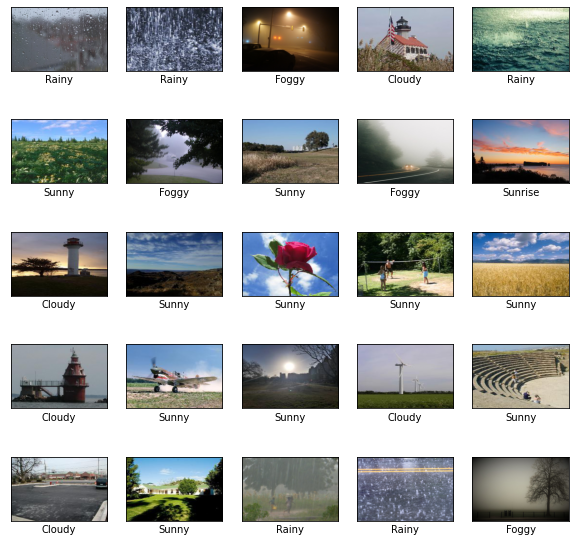

In [ ]:
image_plot_train = image_train / 255

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_plot_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[label_train[i]])
plt.show()


In [ ]:
# Creazione della base convoluzionale

num_classes = 5

model = Sequential([
                     data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(200, 300, 3)),
  
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.8),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])


In [ ]:
# Compilazione del modello

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 200, 300, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 200, 300, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 200, 300, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 150, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 75, 64)       

In [ ]:
history = model.fit(image_train, label_train, epochs=50, 
                    validation_data=(image_test, label_test))

Epoch 1/50
34/34 [==============================] - 35s 84ms/step - loss: 1.3595 - accuracy: 0.3974 - val_loss: 1.1808 - val_accuracy: 0.4095
Epoch 2/50
34/34 [==============================] - 2s 51ms/step - loss: 0.9765 - accuracy: 0.5942 - val_loss: 0.8230 - val_accuracy: 0.6769
Epoch 3/50
34/34 [==============================] - 2s 51ms/step - loss: 0.8131 - accuracy: 0.7001 - val_loss: 0.8130 - val_accuracy: 0.6964
Epoch 4/50
34/34 [==============================] - 2s 51ms/step - loss: 0.7361 - accuracy: 0.6982 - val_loss: 0.7812 - val_accuracy: 0.7047
Epoch 5/50
34/34 [==============================] - 2s 50ms/step - loss: 0.6113 - accuracy: 0.7744 - val_loss: 0.5876 - val_accuracy: 0.7744
Epoch 6/50
34/34 [==============================] - 2s 51ms/step - loss: 0.5519 - accuracy: 0.7911 - val_loss: 0.7983 - val_accuracy: 0.7103
Epoch 7/50
34/34 [==============================] - 2s 51ms/step - loss: 0.5349 - accuracy: 0.8022 - val_loss: 0.6236 - val_accuracy: 0.7827
Epoch 8/50
3

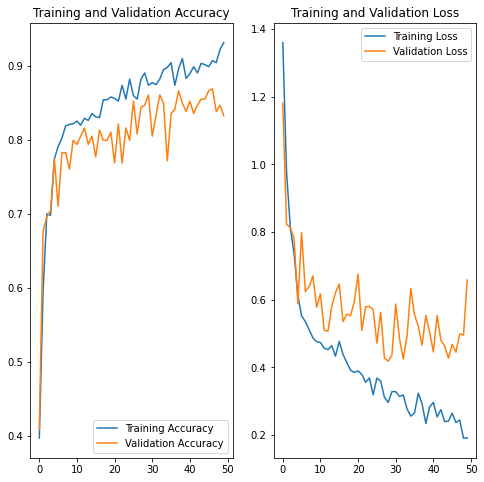

In [ ]:
# Valutazione del modello

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

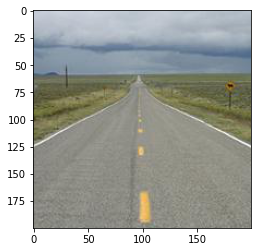

In [ ]:
img_test_cloudy = imread("/content/drive/MyDrive/cloudy_226.jpg")
plt.imshow(img_test_cloudy, cmap=plt.cm.binary)
plt.show()

In [ ]:
img_test_cloudy = img_test_cloudy[0:200, 0:300]
img_test_cloudy = resize(img_test_cloudy, output_shape=(200, 300, 3), preserve_range=True)
img_array = np.empty((1, 200,300, 3), dtype=np.float64)
img_array[0] = img_test_cloudy


In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Cloudy with a 70.83 percent confidence.


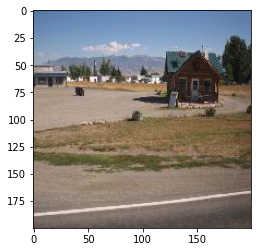

In [ ]:
img_test_sunny = imread("/content/drive/MyDrive/sunny_454.jpg")
plt.imshow(img_test_sunny, cmap=plt.cm.binary)
plt.show()

In [ ]:
img_test_sunny = img_test_sunny[0:200, 0:300]
img_test_sunny = resize(img_test_sunny, output_shape=(200, 300, 3), preserve_range=True)
img_array = np.empty((1, 200,300, 3), dtype=np.float64)
img_array[0] = img_test_sunny


In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Sunny with a 99.84 percent confidence.


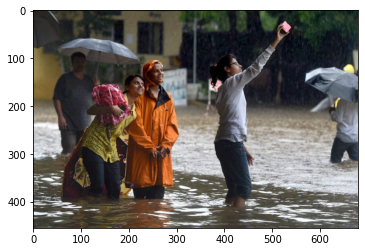

In [ ]:
img_test_rainy = imread("/content/drive/MyDrive/rainy_27.jpg")
plt.imshow(img_test_rainy, cmap=plt.cm.binary)
plt.show()

In [ ]:
img_test_rainy = img_test_rainy[0:200, 0:300]
img_test_rainy = resize(img_test_rainy, output_shape=(200, 300, 3), preserve_range=True)
img_array = np.empty((1, 200,300, 3), dtype=np.float64)
img_array[0] = img_test_rainy

In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Sunny with a 83.76 percent confidence.


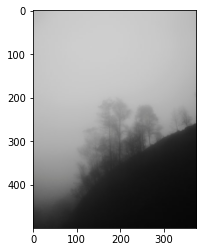

In [ ]:
img_test_foggy = imread("/content/drive/MyDrive/foggy_38.jpg")
plt.imshow(img_test_foggy, cmap=plt.cm.binary)
plt.show()

In [ ]:
img_test_foggy = img_test_foggy[0:200, 0:300]
img_test_foggy= resize(img_test_foggy, output_shape=(200, 300, 3), preserve_range=True)
img_array = np.empty((1, 200,300, 3), dtype=np.float64)
img_array[0] = img_test_foggy

In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Foggy with a 93.23 percent confidence.


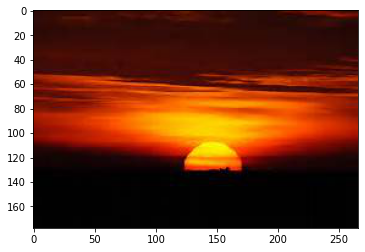

In [ ]:
img_test_sunrise = imread("/content/drive/MyDrive/sunrise_229.jpg")
plt.imshow(img_test_sunrise, cmap=plt.cm.binary)
plt.show()

In [ ]:
img_test_sunrise = img_test_sunrise[0:200, 0:300]
img_test_sunrise= resize(img_test_sunrise, output_shape=(200, 300, 3), preserve_range=True)
img_array = np.empty((1, 200,300, 3), dtype=np.float64)
img_array[0] = img_test_sunrise

In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Sunrise with a 100.00 percent confidence.
